In [1]:
import numpy
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
allsentences = ["Joe waited for the train", "The train was late", "Mary and Samantha took the bus", 
            "I looked for Mary and Samantha at the bus station", 
            "Mary and Samantha arrived at the bus station early but waited until noon for the bus"]

In [3]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(allsentences)):
    print(i)
    title = re.sub('[^a-zA-Z]', ' ', allsentences[i])
    title = title.lower()
    title = title.split()
    title = [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title = ' '.join(title)
    corpus.append(title)

0
1
2
3
4


In [4]:
corpus

['joe wait train',
 'train late',
 'mari samantha took bu',
 'look mari samantha bu station',
 'mari samantha arriv bu station earli wait noon bu']

In [5]:
from sklearn.feature_extraction.text import CountVectorizer


#Creating the bag of words
bow_article = CountVectorizer().fit(corpus)

count_tokens=bow_article.get_feature_names()

article_vect = bow_article.transform(corpus)
count_tokens

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['arriv',
 'bu',
 'earli',
 'joe',
 'late',
 'look',
 'mari',
 'noon',
 'samantha',
 'station',
 'took',
 'train',
 'wait']

In [6]:
df_count_vect=pd.DataFrame(data=article_vect.toarray(),columns=count_tokens)
df_count_vect

,arriv,bu,earli,joe,late,look,mari,noon,samantha,station,took,train,wait
0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,1,0,1,0,0
3,0,1,0,0,0,1,1,0,1,1,0,0,0
4,1,2,1,0,0,0,1,1,1,1,0,0,1


In [7]:
article_vect.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
       [1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1]])

In [8]:
dir(bow_article)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',

In [9]:
bow_article.vocabulary_

{'joe': 3,
 'wait': 12,
 'train': 11,
 'late': 4,
 'mari': 6,
 'samantha': 8,
 'took': 10,
 'bu': 1,
 'look': 5,
 'station': 9,
 'arriv': 0,
 'earli': 2,
 'noon': 7}

<function matplotlib.pyplot.show(*args, **kw)>

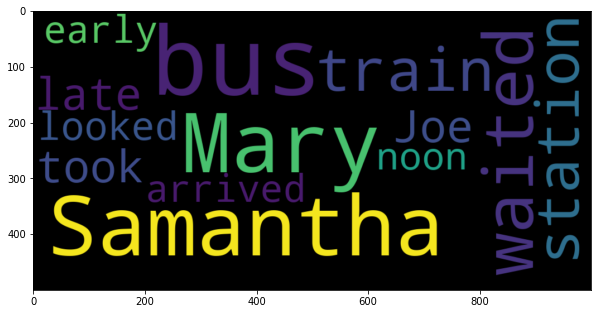

In [10]:
plt.figure(figsize=(10,10))
unique_string=(" ").join(allsentences)
wordcloud = WordCloud(width = 1000, height = 500,min_font_size=5).generate(unique_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show